<a href="https://colab.research.google.com/github/AirPro/DeepLearning/blob/Module2Assignment/Module2Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module Two Hands On Assignment
January 25, 2023 <br>
By: Robert Freid for Deep Learning Class

In [34]:
# import modules and libraries
import numpy as np
import matplotlib.pyplot as plt

## Use the Fashion MNIST dataset named fashion_mnist
Load the data from Repository <br>
Display the shape ofnthe dataset

In [35]:
# import the Fashion_Mnist dataset from Keras
from tensorflow.keras.datasets import fashion_mnist

# Save the training set in X_Train and X_Test and the testing data in y_train and y_test
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# display the shape of the imported dataset
print("X_train shape = ", X_train.shape)
print("y_train shape = ", y_train.shape)
print("X_test shape = ", X_test.shape)
print("y_test shape = ", y_test.shape)

X_train shape =  (60000, 28, 28)
y_train shape =  (60000,)
X_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


## Plot the image at location 2351 in the dataset using the pyplot library.

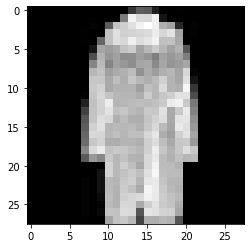

In [36]:
# image at location 2351
plt.imshow(X_train[2351], cmap = plt.get_cmap('gray'))

## Perform the requirement to preprocess the dataset

In [37]:
# change integers to 32-bit floating point numbers
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize each value for each pixel for the entire vector for each input
X_train /= 255
X_test /= 255

# Reshape the datasets which allows adding or removing demensions in an array
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000, 28,28,1)

# Verify using print fuction datasets
print("Training matrix shape: ", X_train.shape)
print("Testing matrix shape: ", X_test.shape)



Training matrix shape:  (60000, 28, 28, 1)
Testing matrix shape:  (10000, 28, 28, 1)


In [38]:
# Preparing the labels by converting them to one-hot-encoder

from keras.utils import np_utils

# number of unique digits in the MNIST dataset
nb_classes = 10

# convert the Y_train and y_test to one-hot-encoding
y_train = np_utils.to_categorical(y_train, nb_classes )
y_test = np_utils.to_categorical(y_test, nb_classes)

# display the shape of the converted datasets
print("Training labels shape: ", y_train.shape)
print("Testing labels shape: ", y_test.shape)

Training labels shape:  (60000, 10)
Testing labels shape:  (10000, 10)


# Create a Convolutional Neural Network
Must contain the following: <br>
2D-CNN, Max-pooling <br>
2D-CNN, Max-pooling <br>
2D-CNN, Max-pooling <br>
Flatten, Dropout, Dense64 <br>
softmax dense layer <br>
SETTINGS <br>
Set kernal sizes of the 2D-CNNs to 32, 64, 64 <br>
Set kernal size to 3 x 3 <br>
Set Max-pooling to 2 x 2 <br>
Check the model SUMMARY <br>
Compile the model <br>


In [39]:
# import statement
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D

In [40]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = "relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, kernel_size = (3,3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))


In [41]:
# Display the summary information for the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)        

# Compile the Model

In [42]:
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics="accuracy")

# Train the Model
Set epochs to 15 <br>
Set batch size to 128 <br>
Set the validation to 0.15

In [43]:
history = model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.15)

Epoch 1/15
399/399 [==============================] - 47s 115ms/step - loss: 0.9279 - accuracy: 0.6660 - val_loss: 0.5788 - val_accuracy: 0.7897
Epoch 2/15
399/399 [==============================] - 46s 114ms/step - loss: 0.6352 - accuracy: 0.7719 - val_loss: 0.4999 - val_accuracy: 0.8224
Epoch 3/15
399/399 [==============================] - 47s 119ms/step - loss: 0.5742 - accuracy: 0.7949 - val_loss: 0.4616 - val_accuracy: 0.8316
Epoch 4/15
399/399 [==============================] - 46s 114ms/step - loss: 0.5336 - accuracy: 0.8081 - val_loss: 0.4354 - val_accuracy: 0.8416
Epoch 5/15
399/399 [==============================] - 47s 119ms/step - loss: 0.5032 - accuracy: 0.8204 - val_loss: 0.4150 - val_accuracy: 0.8457
Epoch 6/15
399/399 [==============================] - 46s 115ms/step - loss: 0.4813 - accuracy: 0.8274 - val_loss: 0.3974 - val_accuracy: 0.8541
Epoch 7/15
399/399 [==============================] - 47s 119ms/step - loss: 0.4616 - accuracy: 0.8348 - val_loss: 0.3878 - val_ac

In [44]:
history.history

{'loss': [0.9278679490089417,
  0.6351746916770935,
  0.5741941332817078,
  0.5336217880249023,
  0.5031634569168091,
  0.48126059770584106,
  0.4615972340106964,
  0.44600674510002136,
  0.4330751895904541,
  0.4151054322719574,
  0.4081726372241974,
  0.39583820104599,
  0.38549473881721497,
  0.37431204319000244,
  0.3693043291568756],
 'accuracy': [0.666039228439331,
  0.7719215750694275,
  0.7949215769767761,
  0.8081372380256653,
  0.8204313516616821,
  0.8274313807487488,
  0.8347647190093994,
  0.8405489921569824,
  0.8447843194007874,
  0.8504706025123596,
  0.8542352914810181,
  0.8579803705215454,
  0.8604313731193542,
  0.8669607639312744,
  0.8674705624580383],
 'val_loss': [0.5788329243659973,
  0.4998696744441986,
  0.461609810590744,
  0.4354299008846283,
  0.41497907042503357,
  0.3973632752895355,
  0.38778916001319885,
  0.37829065322875977,
  0.36068153381347656,
  0.36049684882164,
  0.34277066588401794,
  0.3427852690219879,
  0.3417384922504425,
  0.3283531665802

# Plot the training versus validation loss
Submit a .pdf file of screenshots of each code block being executed.

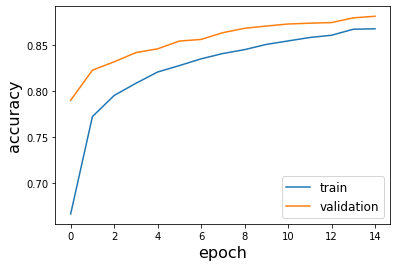

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch', fontsize=16)
plt.ylabel('accuracy', fontsize=16)
plt.legend(['train', 'validation'], loc='lower right', fontsize='large')
plt.show()

# Evaluate the model display the score

In [46]:
score = model.evaluate(X_test, y_test)

print("Test loss value: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.3351 - accuracy: 0.8779
Test loss value:  0.33506321907043457
Test accuracy:  0.8779000043869019
